In [1]:
import pydicom
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path = "C:/Users/taaha/Downloads/ct_nonequi_tilt/164515-00000014.dcm"
ds = pydicom.read_file(path)
ds

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 236
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.9.4245.8173625368922488667248605832916382292
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.826.0.1.3680043.9.4245.0.0.0.0.1.48.20
(0002, 0013) Implementation Version Name         SH: 'Aliza 1.48.20'
(0002, 0016) Source Application Entity Title     AE: 'ALIZAAE'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.826.

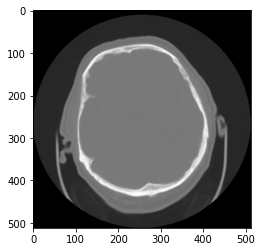

In [3]:
plt.imshow(ds.pixel_array, cmap = 'gray')

In [4]:
ds.pixel_array[0, 0].dtype

dtype('int16')

In [5]:
unique = np.unique(ds.pixel_array)
len(unique)

2745

In [6]:
data = ds.pixel_array.tobytes()
len(data)

524288

In [7]:
primary = data[1::2]
secondary = data[0::2]

print(int(primary[0]))
print(int(secondary[0]))

250
36


In [8]:
# primary = bytearray()
# secondary = bytearray()

# for pixel in ds.pixel_data.flatten():

# 	a = (0x0000ff00 & pixel) >> 8
# 	b = (0x000000ff & pixel)

# 	back = int(np.int16(a << 8 | b))

# 	# print(a, b, pixel, back)

# 	primary.append(a)
# 	secondary.append(b)

# data_bytes = primary + secondary
# print(len(data_bytes), len(primary), len(secondary))
# # print(data_bytes)

In [9]:
from pydicom import dcmread
from pydicom.data import get_testdata_file
from pydicom.uid import RLELossless

original_size = os.path.getsize(path)

arr = ds.pixel_array
ds.compress(RLELossless, arr, encoding_plugin = 'pylibjpeg')
saved_to = f"C:/Users/taaha/Downloads/rle_ct_dataset/164515-00000014.dcm"
ds.save_as(saved_to)

size = os.path.getsize(saved_to)
print(original_size, size)
ratio = original_size / size
print(ratio)


526224 255808
2.0571053289967476
